In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.

In [5]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


In [6]:
# Verifica os tipos de dados de cada coluna
print(df.dtypes)

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object


In [7]:
# Transformações necessárias: Primeiro converteremos os dtypes

# 1. Converter 'Age' para inteiro, tratando possíveis erros
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')

# 2. Converter 'Number of Children' para inteiro, tratando possíveis erros
df['Number of Children'] = pd.to_numeric(df['Number of Children'], errors='coerce').astype('Int64')

print(df.dtypes)

Age                    Int64
Gender                object
Income                object
Education             object
Marital Status        object
Number of Children     Int64
Home Ownership        object
Credit Score          object
dtype: object


In [8]:
# Limpar os valores: remover as vírgulas e substituir a vírgula decimal por ponto
df['Income'] = df['Income'].str.replace('.', '', regex=False)  # Remove as vírgulas
df['Income'] = df['Income'].str.replace(',', '.', regex=False)  # Substitui a vírgula decimal por ponto

# Converter para tipo numérico (float)
df['Income'] = df['Income'].astype(float)

# Verificar os tipos de dados das colunas
print(df.dtypes)
print(df)

Age                     Int64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      Int64
Home Ownership         object
Credit Score           object
dtype: object
     Age  Gender    Income            Education Marital Status  \
0     25  Female   50000.0    Bachelor's Degree         Single   
1     30    Male  100000.0      Master's Degree        Married   
2     35  Female   75000.0            Doctorate        Married   
3     40    Male  125000.0  High School Diploma         Single   
4     45  Female  100000.0    Bachelor's Degree        Married   
..   ...     ...       ...                  ...            ...   
159   29  Female   27500.0  High School Diploma         Single   
160   34    Male   47500.0   Associate's Degree         Single   
161   39  Female   62500.0    Bachelor's Degree        Married   
162   44    Male   87500.0      Master's Degree         Single   
163   49  Female   7

In [9]:
# Verificar se há valores nulos após as transformações

print(df.isnull().sum())

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64


In [10]:
# Tratamento de valores ausentes
df["Age"] = df["Age"].fillna(df["Age"].median())
print(df.isnull().sum())

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


In [11]:
# Tratamento de valores ausentes
df["Age"].fillna(df["Age"].median(), inplace=True)  # Substituindo NaN pela mediana para manter a distribuição dos dados
print(df["Age"].isna().sum())  #imprimi 0 se todos os NaNs foram substituídos


0


<ipython-input-11-52068dec0200>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)  # Substituindo NaN pela mediana para manter a distribuição dos dados


In [12]:
# Codificação One-Hot Encoding para variáveis categóricas nominais
df = pd.get_dummies(df, columns=['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score'], drop_first=True)

In [13]:
print(df.info())  # Verifica tipos de dados
print(df.head())  # Visualiza as primeiras linha

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            164 non-null    Int64  
 1   Income                         164 non-null    float64
 2   Number of Children             164 non-null    Int64  
 3   Gender_Male                    164 non-null    bool   
 4   Education_Bachelor's Degree    164 non-null    bool   
 5   Education_Doctorate            164 non-null    bool   
 6   Education_High School Diploma  164 non-null    bool   
 7   Education_Master's Degree      164 non-null    bool   
 8   Marital Status_Single          164 non-null    bool   
 9   Home Ownership_Rented          164 non-null    bool   
 10  Credit Score_High              164 non-null    bool   
 11  Credit Score_Low               164 non-null    bool   
dtypes: Int64(2), bool(9), float64(1)
memory usage: 5.7

#ANÁLISE UNIVARIADA

In [14]:
# Exibir estatísticas descritivas das variáveis numéricas
df.describe()


,Age,Income,Number of Children
count,164.0,164.000000,164.0
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.0,25000.000000,0.0
25%,31.75,57500.000000,0.0
50%,36.0,83750.000000,0.0
75%,43.0,105000.000000,1.0
max,53.0,162500.000000,3.0


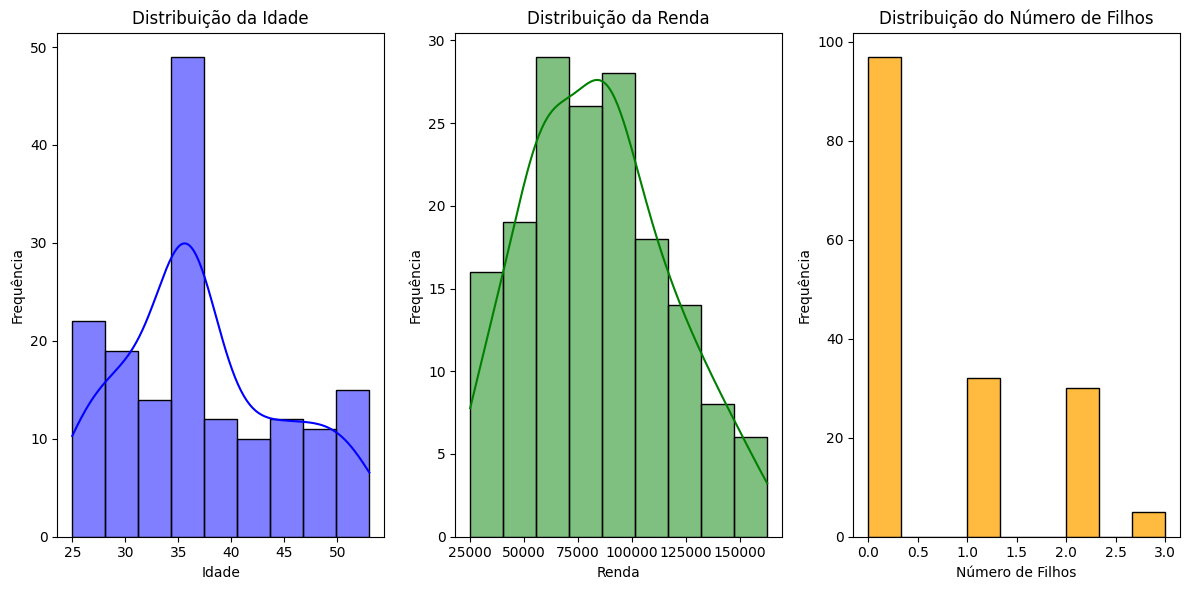

In [15]:
# Plotando distribuições para Age, Income e Number of Children
plt.figure(figsize=(12, 6))

# Distribuição de Age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Distribuição de Income
plt.subplot(1, 3, 2)
sns.histplot(df['Income'], kde=True, color='green')
plt.title('Distribuição da Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')

# Distribuição de Number of Children
plt.subplot(1, 3, 3)
sns.histplot(df['Number of Children'], kde=False, color='orange')
plt.title('Distribuição do Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

#Identificação de outliers usando Boxplots:

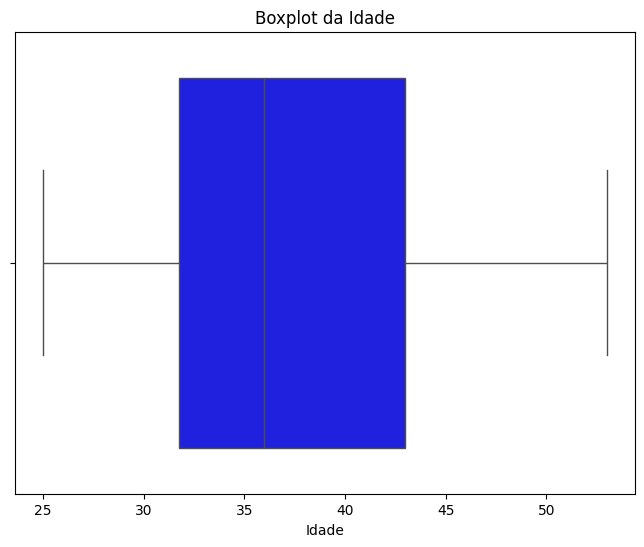

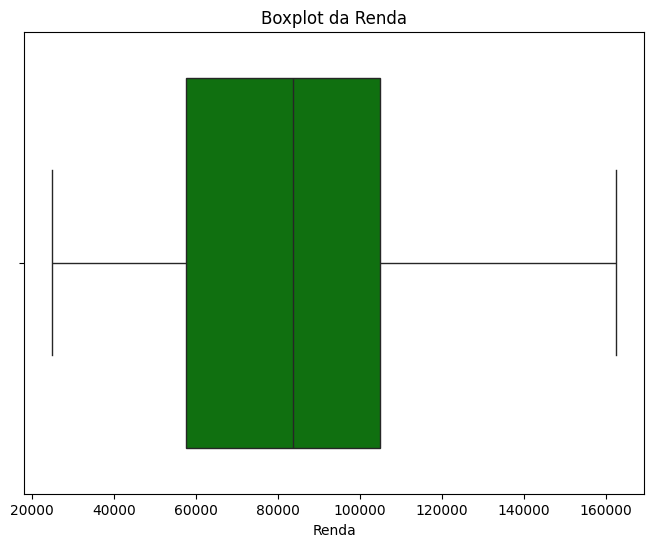

In [16]:
# Boxplot para Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='blue')
plt.title('Boxplot da Idade')
plt.xlabel('Idade')
plt.show()

# Boxplot para Income
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'], color='green')
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

#Cálculo de IQR e Detecção de Outliers:

In [17]:
# Cálculo do IQR para a coluna 'Income'
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Limite Inferior para Income: {lower_bound}')
print(f'Limite Superior para Income: {upper_bound}')

# Identificando outliers em Income
outliers_income = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f'Número de outliers na Renda: {len(outliers_income)}')

Limite Inferior para Income: -13750.0
Limite Superior para Income: 176250.0
Número de outliers na Renda: 0


In [18]:
# Cálculo do IQR para a coluna 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Limite Inferior para Age: {lower_bound}')
print(f'Limite Superior para Age: {upper_bound}')

# Identificando outliers em Age
outliers_age = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f'Número de outliers na Age: {len(outliers_age)}')

Limite Inferior para Age: 14.875
Limite Superior para Age: 59.875
Número de outliers na Age: 0


In [19]:
# Cálculo do IQR para a coluna 'Number of Children'
Q1 = df['Number of Children'].quantile(0.25)
Q3 = df['Number of Children'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Limite Inferior para Number of Children: {lower_bound}')
print(f'Limite Superior para Number of Children: {upper_bound}')

# Identificando outliers em Income
outliers_children = df[(df['Number of Children'] < lower_bound) | (df['Number of Children'] > upper_bound)]
print(f'Número de outliers na Number of Children: {len(outliers_children)}')

Limite Inferior para Number of Children: -1.5
Limite Superior para Number of Children: 2.5
Número de outliers na Number of Children: 5


Após analise detalhada dos dados e gráficos, foi possivel analisar outliers na coluna Number of Children, com isso realizei no proximo bloco a substituição deles por valores dentro do intervalo aceitável. No seu caso, o limite inferior é -1.5 (não faz sentido ter um número negativo de filhos) e o limite superior é 2.5

In [20]:
# Substituindo os outliers com os limites inferiror e superior
df['Number of Children'] = df['Number of Children'].clip(lower=0, upper=2)

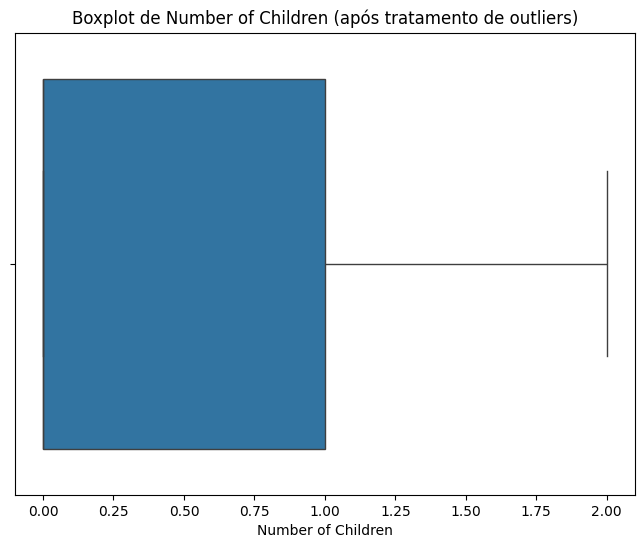

count       164.0
mean     0.621951
std      0.816099
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           2.0
Name: Number of Children, dtype: Float64


In [21]:
# Visualizando o boxplot para verificar a distribuição após o tratamento
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Number of Children'])
plt.title('Boxplot de Number of Children (após tratamento de outliers)')
plt.show()

# Verificando o resumo estatístico após o tratamento
print(df['Number of Children'].describe())


In [36]:
# Remover espaços extras em todos os nomes das colunas
df.columns = df.columns.str.strip()

# Verifique se o problema foi resolvido
print(df.columns)

Index(['Age', 'Income', 'Number of Children', 'Gender_Male',
       'Education_Bachelor's Degree', 'Education_Doctorate',
       'Education_High School Diploma', 'Education_Master's Degree',
       'Marital Status_Single', 'Home Ownership_Rented', 'Credit Score_High',
       'Credit Score_Low'],
      dtype='object')


#Análise Bivariada:

<ipython-input-23-40b26229eef7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Marital Status_Single"], y=df["Age"], palette="coolwarm")


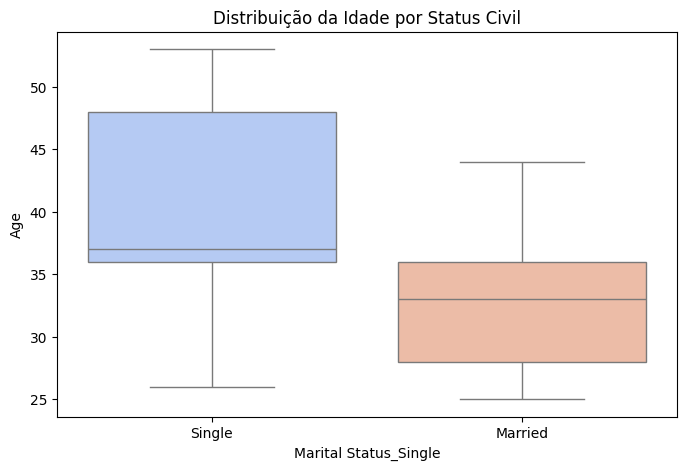

In [23]:
# Relação entre Age e Marital Status_Single
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Marital Status_Single"], y=df["Age"], palette="coolwarm")
plt.xticks([0, 1], ["Single", "Married"])
plt.title("Distribuição da Idade por Status Civil")
plt.show()

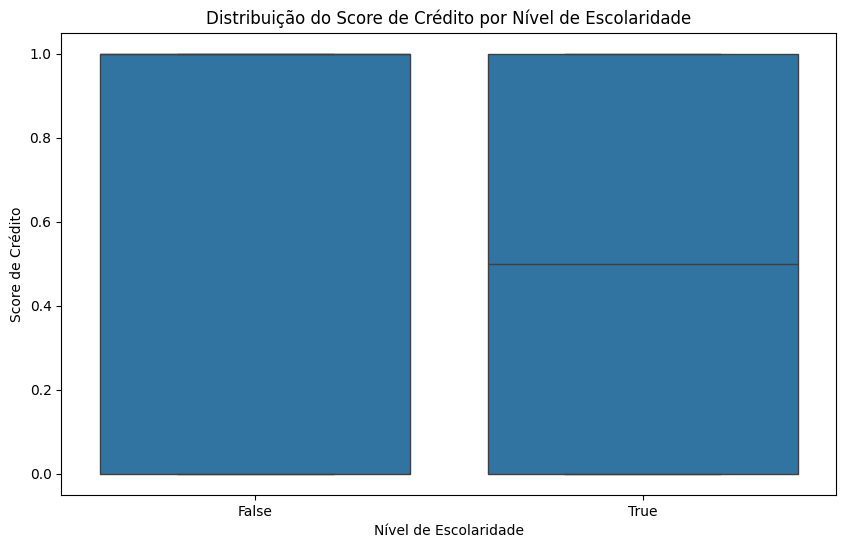

In [38]:
#relação entre o score de crédito e o nível de escolaridade?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education_High School Diploma', y='Credit Score_High')  # Use o nome correto da coluna One-Hot
plt.title('Distribuição do Score de Crédito por Nível de Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Score de Crédito')
plt.show()

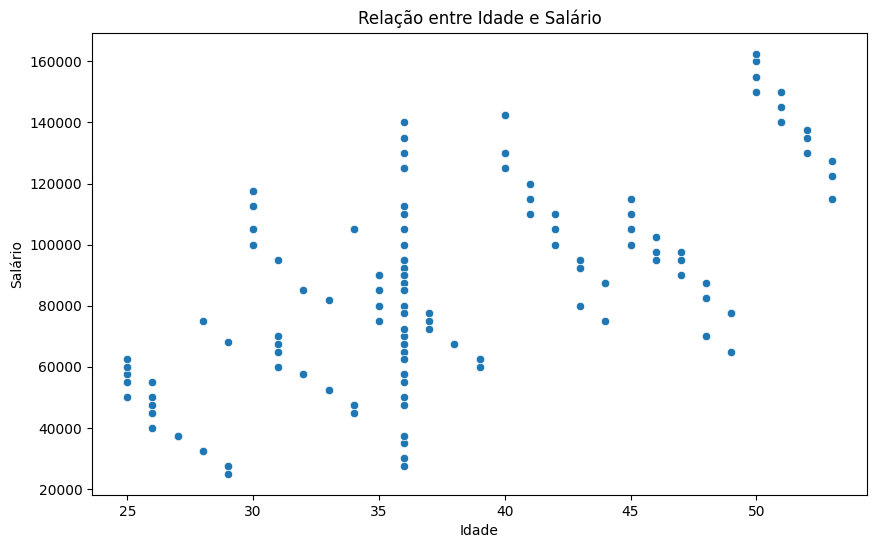

In [40]:
# salário parece influenciar na idade?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Relação entre Idade e Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()

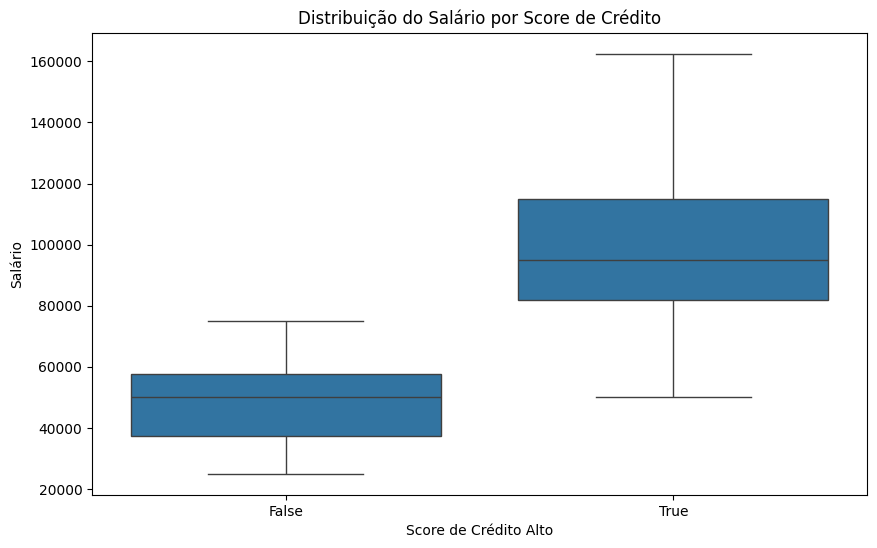

In [41]:
#Verificar a Distribuição do Score de Crédito por salario
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Credit Score_High', y='Income')  # 'Credit Score_High' indica se o score é alto
plt.title('Distribuição do Salário por Score de Crédito')
plt.xlabel('Score de Crédito Alto')
plt.ylabel('Salário')
plt.show()

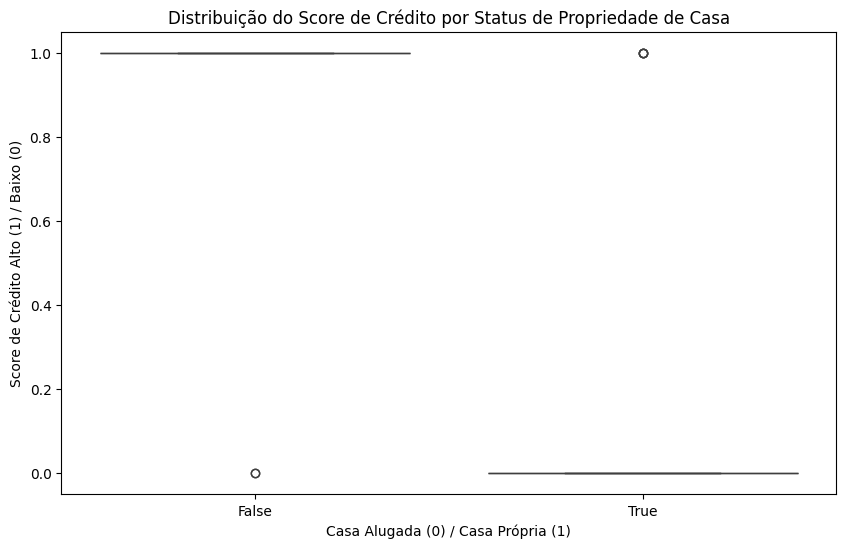

In [42]:
#relação entre "Home Ownership" e "Credit Score"
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Home Ownership_Rented', y='Credit Score_High')  # Relaciona casa própria e score de crédito
plt.title('Distribuição do Score de Crédito por Status de Propriedade de Casa')
plt.xlabel('Casa Alugada (0) / Casa Própria (1)')
plt.ylabel('Score de Crédito Alto (1) / Baixo (0)')
plt.show()

análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**

*   Existe relação entre a idade e o status civil?
Sim, os solteiros tendem a ter a idade média e mediana mais alta em comparação aos casados. Os casados são mais jovens em média do que as solteiras.

*   Qual a relação entre o score de crédito e o nível de escolaridade?
O grafico mostra que quem possue uma escolaridade maior, tende a ter uma pontuação de score um pouco mais alta do que para quem nao tem. Porem, ainda há pessoas com pontuações altas e baixas em ambos os grupos.

*  O salário parece influenciar na idade?
SIM, notamos que a um padrão geral onde o salario tende a aumentar com a idade.

* O salário parece influenciar no Score de Crédito?
Observamos claramente uma diferença nos salários entre os grupos. Indicando que pessoas com bom score de crédito tendem a ter salários mais altos.

* Clientes com casa própria tendem a ter um score mais alto?
Sim, a uma maior concentração de pessoas com casa pr´rpria que possuem um score ligeiramente mais alto.

##PERGUNTAS ADICIONAIS

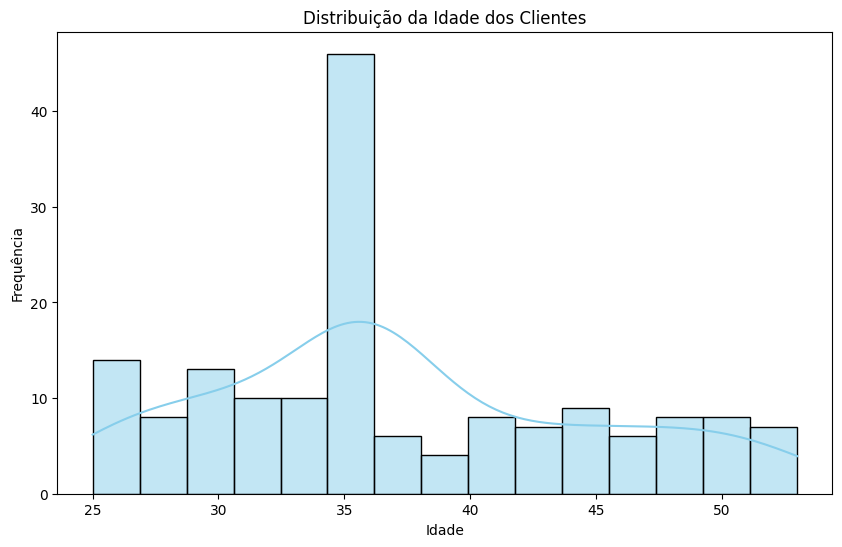

In [43]:
#1. Qual a distribuição da idade dos clientes?
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

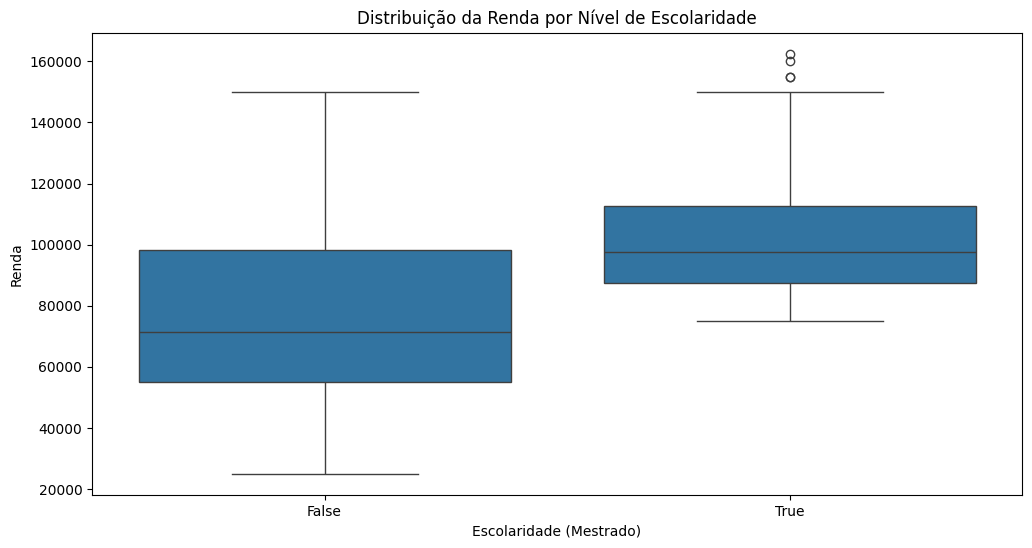

In [44]:
#2. Qual a relação entre o nível de escolaridade e a renda dos clientes?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education_Master\'s Degree', y='Income', data=df)  # Exemplo para 'Master's Degree'
plt.title('Distribuição da Renda por Nível de Escolaridade')
plt.xlabel('Escolaridade (Mestrado)')
plt.ylabel('Renda')
plt.show()

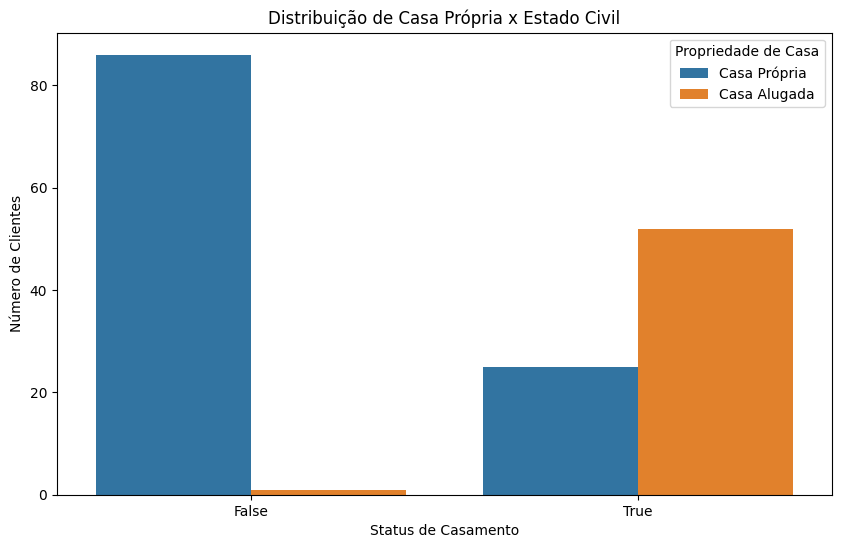

In [45]:
#Qual é a relação entre o status de casamento e a posse de casa?
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital Status_Single', hue='Home Ownership_Rented')
plt.title('Distribuição de Casa Própria x Estado Civil')
plt.xlabel('Status de Casamento')
plt.ylabel('Número de Clientes')
plt.legend(title='Propriedade de Casa', labels=['Casa Própria', 'Casa Alugada'])
plt.show()

Qual a distribuição da idade dos clientes? Vimos que a maioria dos clientes se concentram na faixa etária de 35 anos, com pico entre 35 e 40 anos.

 Qual a relação entre o nível de escolaridade e a renda dos clientes? O grafico mostra que ha uma relação entre ter maior grau de escolaridade como um mestrado e ter uma renda mais alta.

 Qual é a relação entre o status de casamento e a posse de casa?
 É possivel observar uma variedade muito maior de pessoas nao casadas com casa própria do que pessoas solteiras.

##Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

In [46]:
# Calcular a correlação de Pearson entre as variáveis numéricas
correlation_matrix = df.corr()
print(correlation_matrix)

                                    Age    Income  Number of Children  \
Age                            1.000000  0.621492            0.039732   
Income                         0.621492  1.000000            0.064606   
Number of Children             0.039732  0.064606            1.000000   
Gender_Male                    0.204661  0.495738           -0.442884   
Education_Bachelor's Degree   -0.133347 -0.079067            0.272633   
Education_Doctorate            0.187276  0.060776            0.128622   
Education_High School Diploma -0.010121 -0.061150           -0.264775   
Education_Master's Degree      0.097338  0.344382            0.119678   
Marital Status_Single         -0.449115 -0.471004           -0.719163   
Home Ownership_Rented         -0.628042 -0.704928           -0.512199   
Credit Score_High              0.621676  0.730332            0.464984   
Credit Score_Low              -0.293446 -0.507582           -0.242546   

                               Gender_Male  Educat

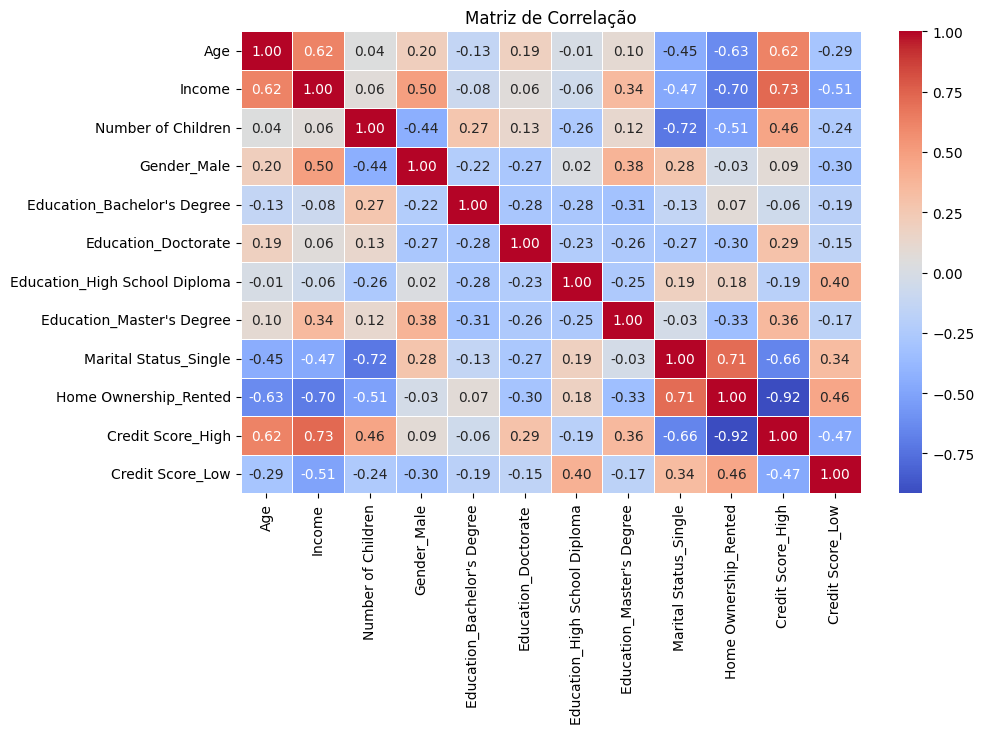

In [47]:
# Plotar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

*Renda e score alta 0,73

*idade e renda 0.62

*Idade e score alto 0.62

Altas: estado civil e renda -0,47 representando que pessoas solteiras tem uma renda menor do que casadas
moradia e renda -0,70 pessoas com casa alugada tendem a ter uma renda menor do que aquelas que possuem casa própria.

Ambas fazem grande sentido com base em toda a analise realizada, sabemos que quanto maior a renda maior a chance de um score mais alto, o ponto idade e score alto podemos pensar que a pessoa pode ter maior experiencia profissional e assim ter um maior salario e assim ter um score mais alto.

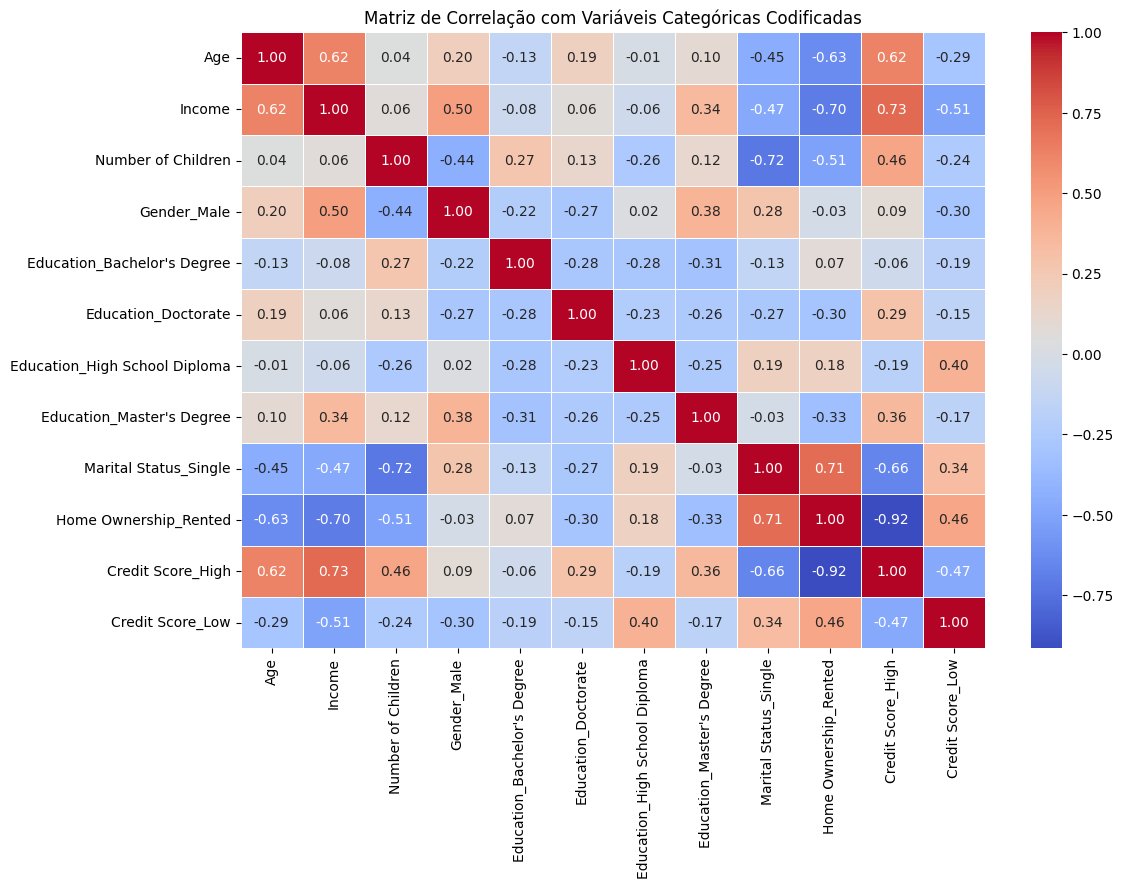

In [48]:
#D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**
## Conforme analisado podemos tirar algumas conclusões como: homens tem maior chance de morar de aluguel do que mulheres. Pessoas solteiras tem a probabilidade maior de morar em casas alugadas comparado aos casados. Ea principal analise
#pessoas que moram em casas alugadas tem uma pontuação de crédito muito mais baixa do que aquelas que possuem casa própria.

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação com Variáveis Categóricas Codificadas')
plt.show()


In [49]:
##F) Faça a separação da base em treino e teste e verifique utilizando shape:

In [53]:
# Variáveis independentes (features)
X = df.drop(columns=['Credit Score_High', 'Credit Score_Low'])

# Variável dependente (target)
y = df['Credit Score_High']  # ou 'Credit Score_Low', dependendo da variável alvo


In [56]:
from sklearn.model_selection import train_test_split

# Divisão em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [57]:
# Verificando o shape das bases
print(f"Shape do conjunto de treino (X_train): {X_train.shape}")
print(f"Shape do conjunto de teste (X_test): {X_test.shape}")
print(f"Shape do target de treino (y_train): {y_train.shape}")
print(f"Shape do target de teste (y_test): {y_test.shape}")

Shape do conjunto de treino (X_train): (114, 10)
Shape do conjunto de teste (X_test): (50, 10)
Shape do target de treino (y_train): (114,)
Shape do target de teste (y_test): (50,)


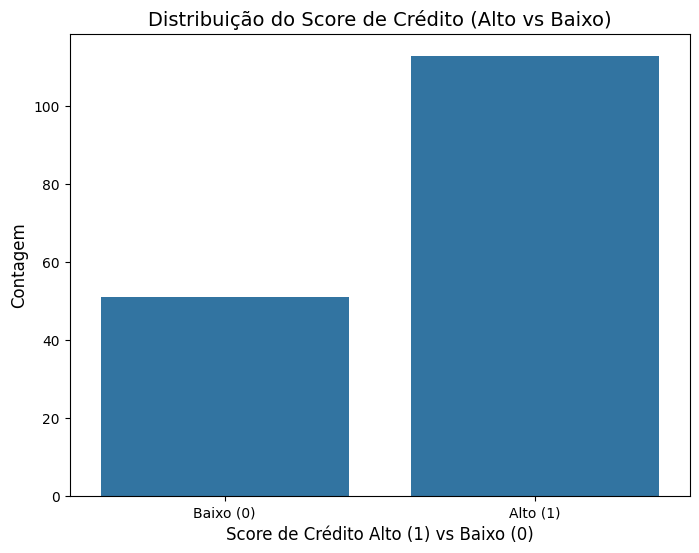

In [59]:
#verificando se nossa coluna de Score de crédito está balanceada, através de um gráfico

# Gráfico de distribuição da variável 'Credit Score_High'
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit Score_High', data=df)
plt.title('Distribuição do Score de Crédito (Alto vs Baixo)', fontsize=14)
plt.xlabel('Score de Crédito Alto (1) vs Baixo (0)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['Baixo (0)', 'Alto (1)'], rotation=0)
plt.show()

Após notar um grande desbalanceamento irei utilizar a tecnica SMOTE criando exemplos sintéticos para a classe minoritária, em vez de simplesmente duplicar os dados existentes.

In [60]:
pip install imbalanced-learn

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

In [62]:
# Definindo X (variáveis independentes) e y (variável dependente)
X = df.drop(columns=['Credit Score_High', 'Credit Score_Low'])  # Ajuste conforme necessário
y = df['Credit Score_High']  # ou 'Credit Score_Low', dependendo da variável alvo

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Garantir que todas as variáveis numéricas sejam do tipo float64
X_train = X_train.astype('float64')

# Para o target, garantir que seja int64
y_train = y_train.astype('int64')

# Verificar novamente
print(X_train.dtypes)
print(y_train.dtypes)



Age                              float64
Income                           float64
Number of Children               float64
Gender_Male                      float64
Education_Bachelor's Degree      float64
Education_Doctorate              float64
Education_High School Diploma    float64
Education_Master's Degree        float64
Marital Status_Single            float64
Home Ownership_Rented            float64
dtype: object
int64


In [76]:
# Inicializando o SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

# Aplicando o SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificando a distribuição de classes após o SMOTE
print(f"Distribuição de classes após o SMOTE: \n{y_train_smote.value_counts()}")


Distribuição de classes após o SMOTE: 
Credit Score_High
1    90
0    90
Name: count, dtype: int64
